# Hydrogen Atom Radial Wavefunctions
## Ordinary differential eigenvalue problem


Eigenvalue problems are boundary value problems that only have solutions for particular values of a parameter.  In quantum mechanics these parameters are the quantized variables, like the energy or angular momentum.  

The hydrogen atom is a standard problem in quantum mechanics. You
basically solve the Schroedinger equation for a 1/r central potential.
We won't go through the separation of variables, but one can separate
variables and end up with a differential equation 
$$
\left(\frac{d^{2}}{dr^{2}}+\frac{2}{r}\frac{d}{dr}\right)R(r)+\frac{2\mu}{\hbar^{2}}\left(E+\frac{Ze^{2}}{r}-\frac{l(l+1)\hbar^{2}}{2\mu r^{2}}\right)R(r)=0
$$
where $R$ is the radial wavefunction, $r$ the radius, $\mu$ the reduced
mass, $Ze$ the charge of the nucleus, $e$ the charge of the electron
and $l$ the angular momentum quantum number.

The first step is to define a new independent variable $\rho$ and
a constant $\lambda$ :
$$
\begin{array}{cc}
\rho=\sqrt{\frac{-8\mu E}{\hbar^{2}}}r & \lambda=\frac{Ze^{2}}{\hbar}\sqrt{\frac{-\mu}{2E}}\end{array};
$$ 

so the equation becomes:

$$
\frac{d^{2}R}{d\rho^{2}}+\frac{2}{\rho}\frac{dR}{d\rho}-\frac{l(l+1)}{\rho^{2}}R+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R=0
$$

We can find and plot the wave function using odeint if we knew $\lambda$ and
$dR/d\rho$ at some point. This is an *eigenvalue* problem -
there only exist (finite) solutions for particular values of $\lambda$.
As is known from the analytical solution, the eigenvalues are
$\lambda=1,2,3,$... 



First, we consider $\lambda=1, l=0.$ The boundary conditions that we want
are that $R=0$ at infinity, and $R$ is finite everywhere. These boundary
conditions are a little tricky to apply numerically - what will end
up happening is that $R$ will diverge due to numerical instabilities
at some point. We start by picking a very large $\rho-$say about 20
and putting in an arbitrary value for $R$, and $dR/d\rho\sim-R/2$ and
integrating in towards 0. We will then explore what happens if we vary
$\lambda$ and $dR/d\rho$.

Here, $R_{20}$ is the initial condition for $R$ at $\rho=20$, and $\frac{dR_{20}}{d\rho}$ is the initial condition for the derivative of $R$ at $\rho=20$.

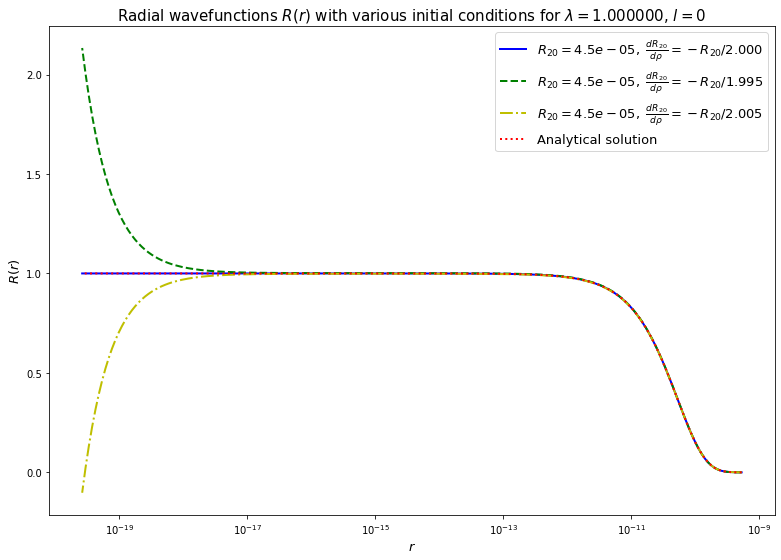

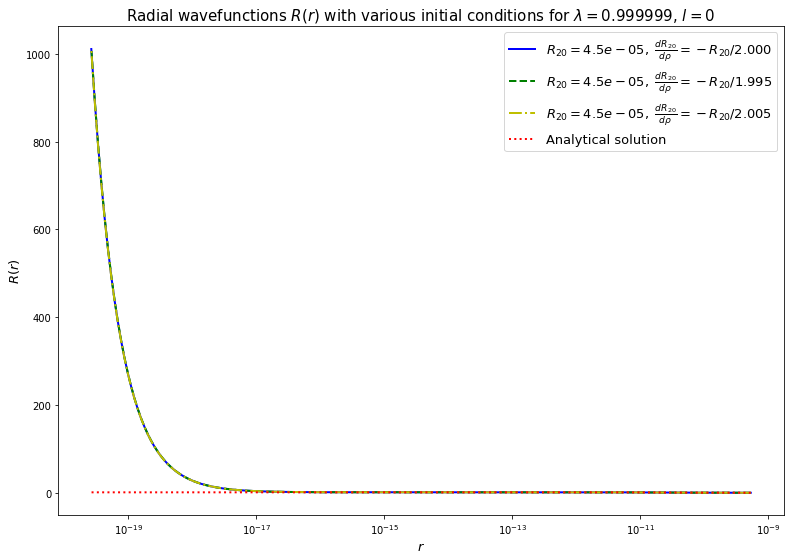

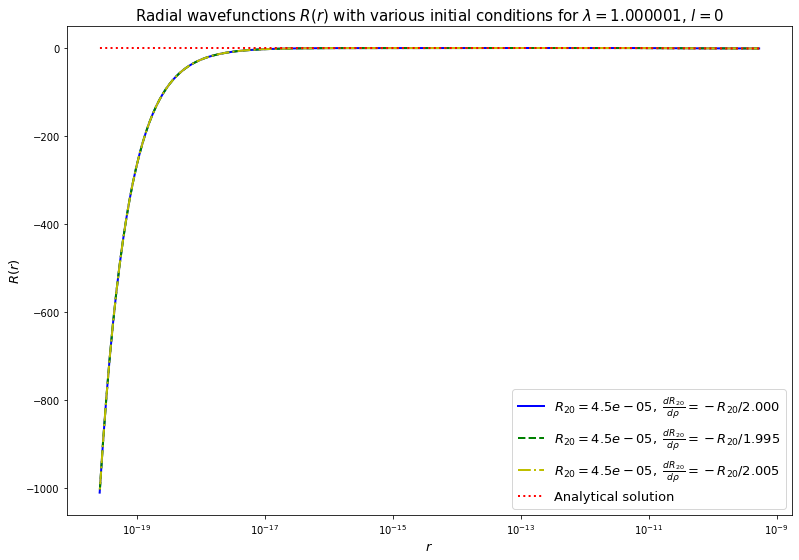

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Constants
hbar = 1.0545718e-34
c = 2.99792458e8  #Speed of light
alpha = 7.2973525693e-3  #Fine structure constant
me = 9.10938356e-31  #Electron mass
mp = 1.6726219e-27  #Proton mass
mu = mp*me/(mp+me)  #Reduced mass
a0 = hbar/(alpha*me*c)  #Bohr radius
E1 = -(alpha**2*me*c**2)/2  #Hydrogenic ground state energy

def Hatom(X, rho, *args):
    #Compute and return the derivatives of R and Q = dR/drho
    
    lbda, l = args
    R, Q = X
    
    dQdrho = l*(l+1)*R/(rho**2) - (lbda/rho - 0.25)*R - (2/rho)*Q
    
    return np.array([Q, dQdrho])

def analytical10(r):
    #Analytical solution is a decaying exponential
    #Here we have ignored scale factors which normalize the wavefunction
    return np.exp(-r/a0)

def solveAndPlot(rho, lbda, l, R0, dRdrho0, analyticalSoln):
    #Solve the ODE and plot solutions as a function of r
    #dRdrho0 must be a list of values
    
    plt.figure(figsize=(13,9))
    
    #Line style and colour for the plots
    ls = ['-','--','-.']
    c = ['b','g','y']
    
    #Compute and plot the solution for various initial conditions on the derivative of R
    for i, Q0 in enumerate(dRdrho0):
        soln = odeint(Hatom, np.array([R0, Q0]), rho, args=(lbda,l))

        R = soln[:,0]
        dRdrho = soln[:,1]
        
        r = rho*hbar/np.sqrt(-8*mu*E1/lbda**2)
        
        labelstr = r'$R_{%d} = %.1e,\ \frac{dR_{%d}}{d\rho} = -R_{%d}/%.3f$' % (rho[0], R0, rho[0], rho[0], -R0/Q0)
        plt.plot(r, R, label=labelstr, linestyle=ls[i], linewidth=2, c=c[i])
        
    plt.xlabel(r'$r$', fontsize=13)
    plt.ylabel(r'$R(r)$', fontsize=13)    
    plt.xscale('log')
    plt.title(r'Radial wavefunctions $R(r)$ with various initial conditions for $\lambda=%.6f$, $l=%d$' % (lbda, l), fontsize=15)
    
    plt.plot(r, analyticalSoln(r), label='Analytical solution', linestyle=':', linewidth=2, c='r')

    plt.legend(fontsize=13)

#Initial condition for R, chosen s.t. R(0)=1
R0 = 4.53778e-5

rho = np.logspace(np.log10(20), -9, 200)
l = 0

for lbda in [1, .999999, 1.000001]:
    solveAndPlot(rho, lbda, l, R0, [-R0/2, -R0/1.995, -R0/2.005], analytical10)

## Similar solutions for other values of $\lambda$ and $l$

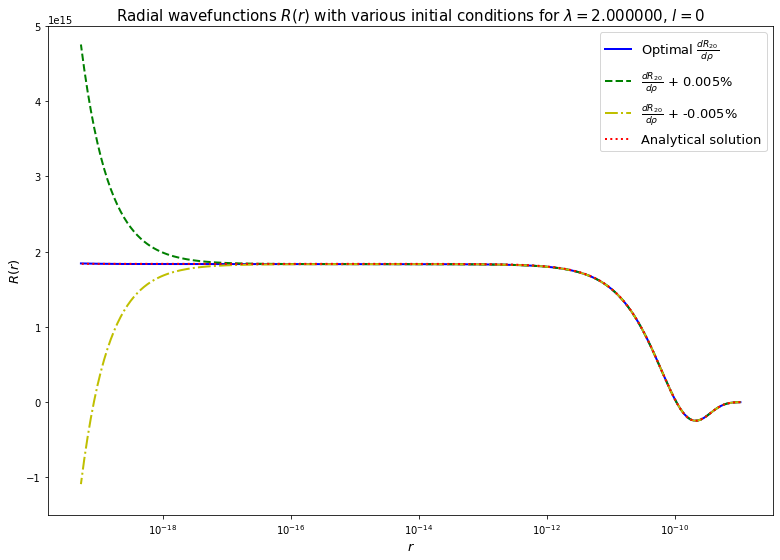

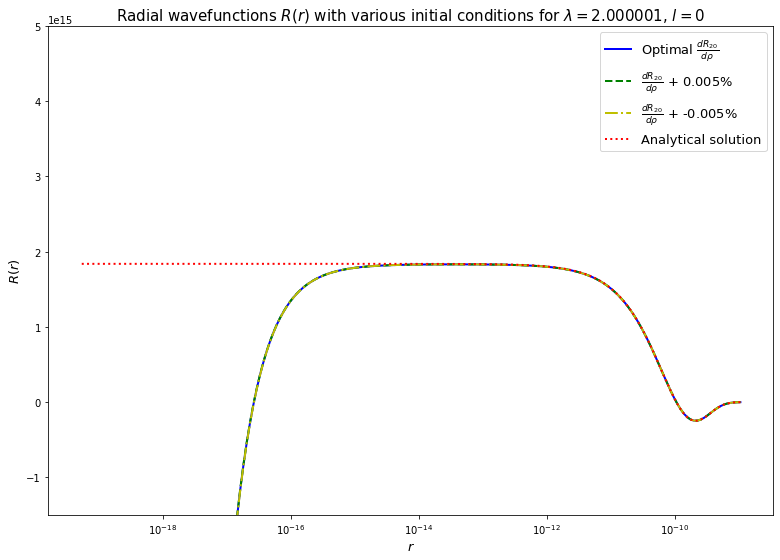

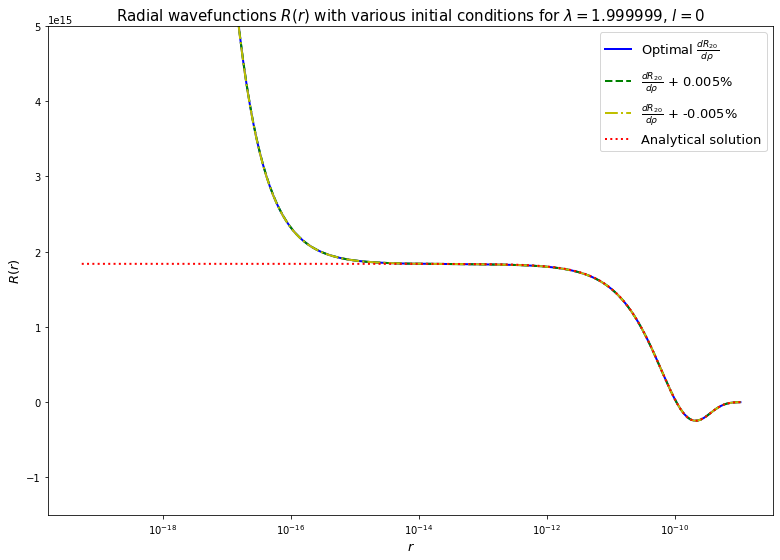

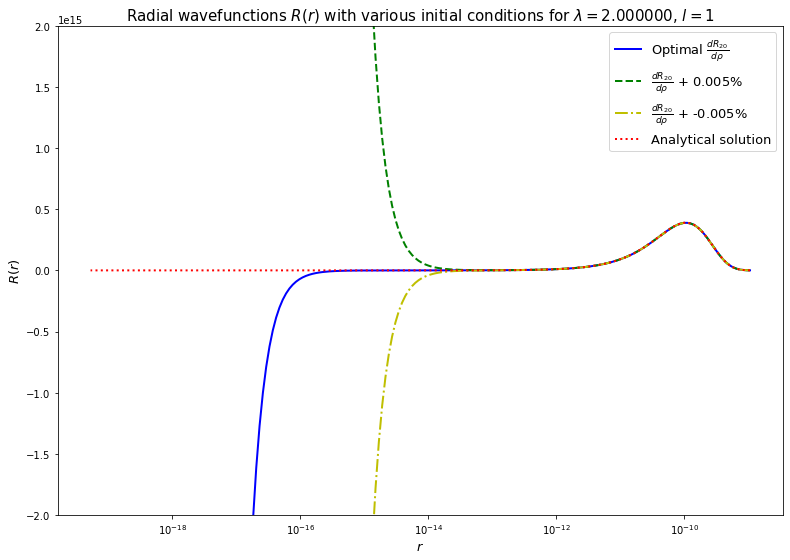

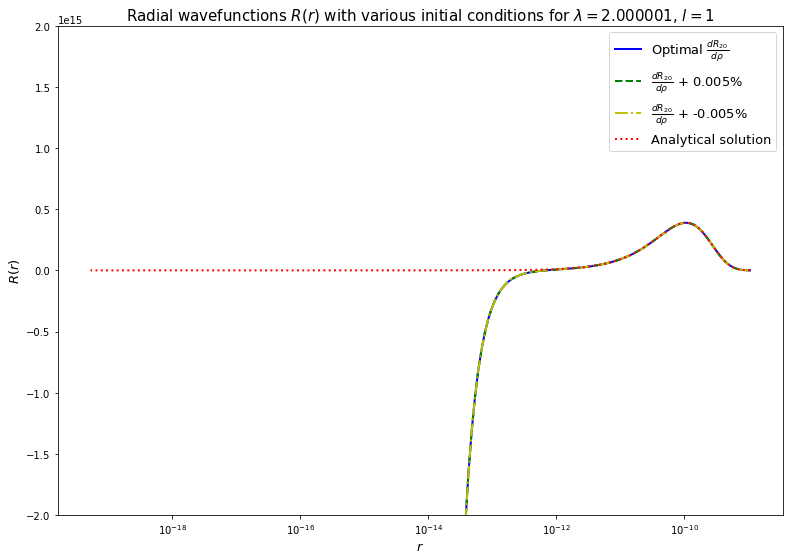

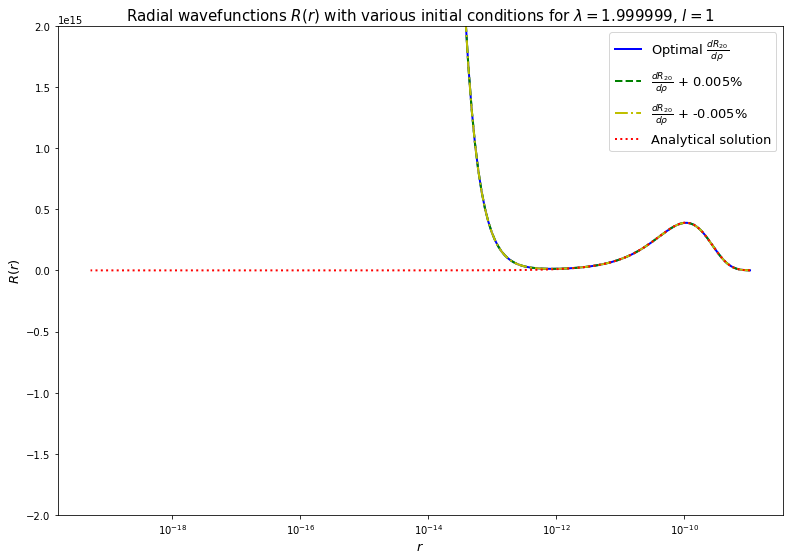

In [7]:
lbda = 2
l = 0

coeff = hbar/np.sqrt(-8*mu*E1/lbda**2)  #r = rho * coeff

def analytical20(r):
    #Compute and return the analytical solution for lambda=2, l=0
    return (1/np.sqrt(2))*a0**(-3/2)*(1 - r/(2*a0))*np.exp(-r/(2*a0))

rho = np.logspace(np.log10(20), -9, 200)

#Initial conditions at rho = 20
R0 = -748770696463.0885
Q0 = 332875650524.2506

for lbda in [2, 2.000001, 1.999999]:
    plt.figure(figsize=(13,9))
    
    #Line style and colour for the plots
    ls = ['-','--','-.']
    c = ['b','g','y']
    
    #Solve the ode and plot the solutions for various initial conditions on the derivative or rho
    for i, Q0dev in enumerate([0, 0.00005, -0.00005]):

        soln = odeint(Hatom, np.array([R0, Q0+Q0dev*Q0]), rho, args=(lbda,l))
        R = soln[:,0]
        r = rho*coeff

        labelstr = r'Optimal $\frac{dR_{20}}{d\rho}$' if Q0dev == 0 else r'$\frac{dR_{20}}{d\rho}$ + %.3f%%' % (Q0dev*100)
        plt.plot(r, R, label=labelstr, linewidth=2, linestyle=ls[i], c=c[i])
        plt.xlabel(r'$r$', fontsize=13)
        plt.ylabel(r'$R(r)$', fontsize=13)

    plt.plot(r, analytical20(r), label='Analytical solution', linestyle=':', linewidth=2, c='r')
    plt.ylim((-1.5e15, 5e15))
    plt.xscale('log')
    plt.title('Radial wavefunctions $R(r)$ with various initial conditions for $\lambda=%.6f$, $l=%d$' % (lbda, l), fontsize=15)
    plt.legend(fontsize=13)
    
lbda = 2
l = 1

def analytical21(r):
    #Compute and return the analytical solution for lambda=2, l=1
    return 24**(-1/2)*a0**(-3/2) * (r/a0)*np.exp(-r/(2*a0))

R0 = 480151984523.38275
Q0 = -216200903973.4473

for lbda in [2, 2.000001, 1.999999]:
    plt.figure(figsize=(13,9))
    
    #Line style and colour for the plots
    ls = ['-','--','-.']
    c=['b','g','y']

    #Solve the ode and plot the solutions for various initial conditions on the derivative or rho
    for i, Q0dev in enumerate([0, 0.00005, -0.00005]):

        soln = odeint(Hatom, np.array([R0, Q0+Q0dev*Q0]), rho, args=(lbda,l))
        R = soln[:,0]
        r = rho*coeff

        labelstr = r'Optimal $\frac{dR_{20}}{d\rho}$' if Q0dev == 0 else r'$\frac{dR_{20}}{d\rho}$ + %.3f%%' % (Q0dev*100)
        plt.plot(r, R, label=labelstr, linewidth=2, linestyle=ls[i], c=c[i])
        plt.ylim((-2e15,2e15))
        plt.xlabel(r'$r$', fontsize=13)
        plt.ylabel(r'$R(r)$', fontsize=13)

    plt.plot(r, analytical21(r), label='Analytical solution', linestyle=':', linewidth=2, c='r')
    plt.xscale('log')
    plt.title('Radial wavefunctions $R(r)$ with various initial conditions for $\lambda=%.6f$, $l=%d$' % (lbda, l), fontsize=15)
    plt.legend(fontsize=13)

For $\lambda=2$, $l=1$ in the above plot, we are not able to find initial conditions that allow the numerical solution to agree with the analytical solution all the way down to $r=5\cdot 10^{-20}$ $(\rho=10^{-9})$. However, it is still clear that altering the initial condition on the derivative of $R$ or the value of $\lambda$ causes the wavefunction to diverge much farther from zero.

## Imposing a positive nuclear radius
The physical potential isn't $1/r$ inside the nucleus. Instead, we
should consider the nucleus as a sphere of uniform charge density
so the potential is 0 at $r=0$, and is proportional to $r$ until we get
to the outside of the nucleus, at $r=1.2\times 10^{-15}$ m. For this case there are no analytic solutions.

For $r>r_0:=1.2\times 10^{-15}$m, the equation for $R$ remains the same as the prevous case, so we may solve for $R$ in this region in the same manner as the previous questions with the potential $$V(r)=\frac{Ze^2}{r}.$$  For $r<r_0$, we change the potential to $$V(r) = \frac{Ze^2}{r_0^2}r$$ which ensures continuity at $r=r_0$.  This leads to the equation
$$\frac{d^2R}{dr^2}+\frac{2}{r}\frac{dR}{dr} + \frac{2\mu}{\hbar^2}\left(E+\frac{Ze^2}{r_0^2}r - \frac{\hbar^2l(l+1)}{2\mu r^2}\right)R=0$$
for R. Substituting in $\rho$ and $\lambda$ gives $$\frac{d^2R}{d\rho^2}+\frac{2}{\rho}\frac{dR}{d\rho}-\frac{l(l+1)}{\rho^{2}}R+\left(\frac{\hbar^2}{8r_0^2E\mu}\lambda\rho - \frac{1}{4}\right)R=0.$$

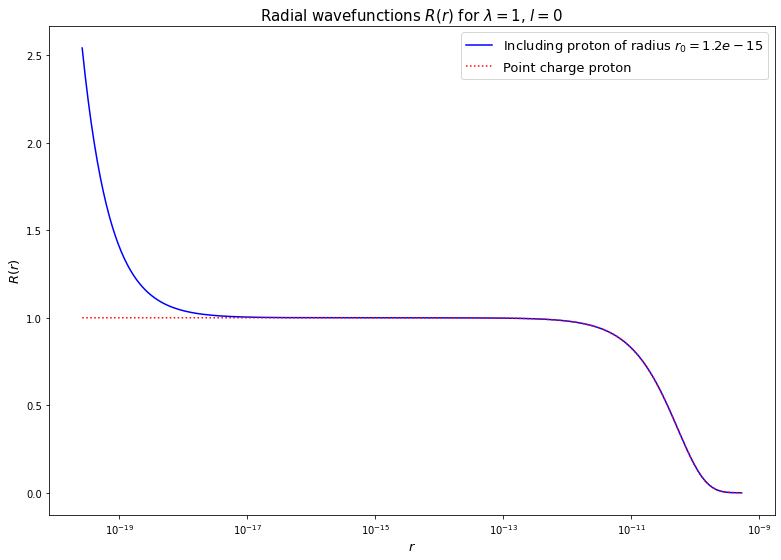

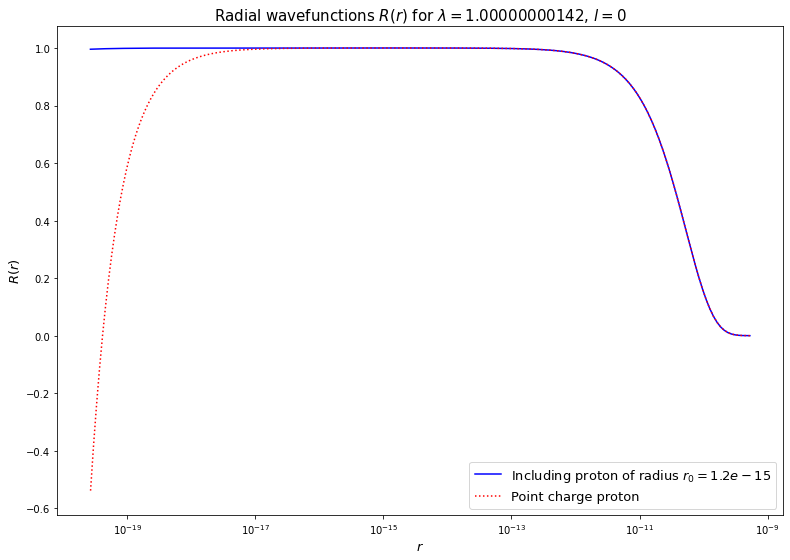

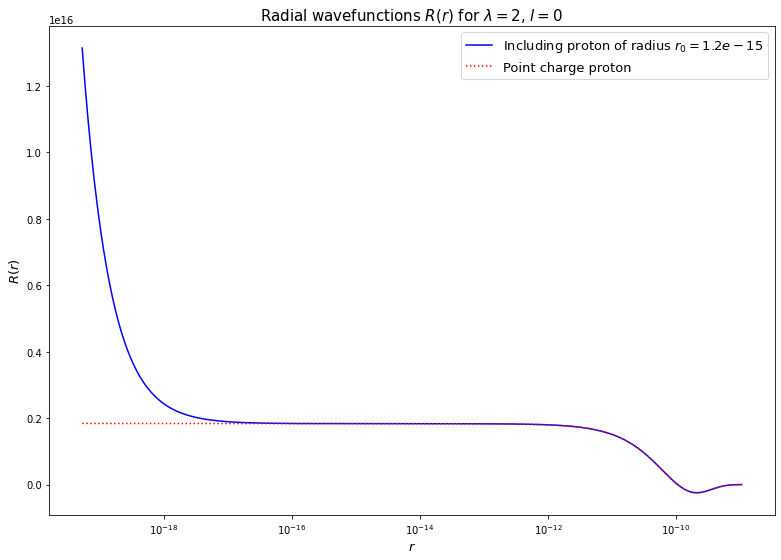

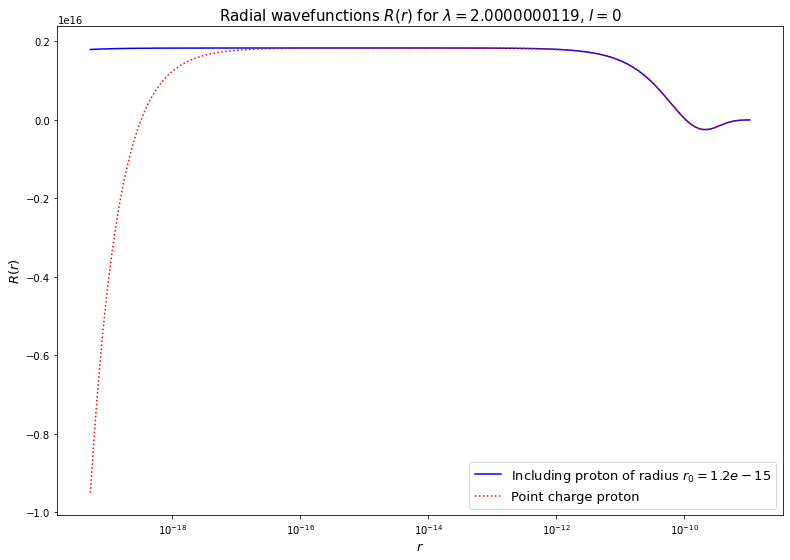

In [8]:
lbda = 1#.00000000142
l = 0

r0 = 1.2e-15  #m   Proton radius
coeff = hbar/np.sqrt(-8*mu*E1/lbda**2)  #r = rho * coeff

def HatomProton(X, rho, *args):
    #Compute and return the derivatives of R and Q = dR/drho for the ODE valid inside the proton
    
    lbda, l = args
    R, Q = X
    
    dQdrho = l*(l+1)*R/(rho**2) - (2/rho)*Q - (hbar**2/(8*r0**2*(E1/lbda**2)*mu)*lbda*rho - 1/4)*R
    
    return np.array([Q, dQdrho])

#Initial conditions
R0 = 4.53778e-5
Q0 = -R0/2

#Compute the solution for r>r0
rho1 = np.logspace(np.log10(20), np.log10(r0/coeff), 100)
soln1 = odeint(Hatom, np.array([R0, Q0]), rho1, args=(lbda,l))
R1 = soln1[:,0]
Q1 = soln1[:,1]

#Compute the solution for r<r0
rho2 = np.logspace(np.log10(r0/coeff), -9, 100)
soln2 = odeint(HatomProton, np.array([R1[-1], Q1[-1]]), rho2, args=(lbda, l))
R2 = soln2[:,0]

#Compute the solution with a point charge proton
rho = np.concatenate((rho1, rho2))
soln = odeint(Hatom, np.array([R0, Q0]), rho, args=(lbda,l))
R = soln[:,0]

#Plot the wavefunctions with and without the positive radius proton assumption
plt.figure(figsize=(13,9))
plt.plot(rho*coeff, np.concatenate((R1,R2)), label='Including proton of radius $r_0=%.1e$' % r0, c='b')
plt.plot(rho*coeff, R, label='Point charge proton', linestyle=':', c='r')
plt.xscale('log')
plt.title('Radial wavefunctions $R(r)$ for $\lambda=%d$, $l=%d$' % (lbda, l), fontsize=15)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$R(r)$', fontsize=13)
plt.legend(fontsize=13)


lbda = 1.00000000142
coeff = hbar/np.sqrt(-8*mu*E1/lbda**2)  #r = rho * coeff

#Compute the solution for r>r0
soln1 = odeint(Hatom, np.array([R0, Q0]), rho1, args=(lbda,l))
R1 = soln1[:,0]
Q1 = soln1[:,1]

#Compute the solution for r<r0
soln2 = odeint(HatomProton, np.array([R1[-1], Q1[-1]]), rho2, args=(lbda, l))
R2 = soln2[:,0]

#Compute the solution with a point charge proton
soln = odeint(Hatom, np.array([R0, Q0]), rho, args=(lbda,l))
R = soln[:,0]

#Plot the wavefunctions with and without the positive radius proton assumption
plt.figure(figsize=(13,9))
plt.plot(rho*coeff, np.concatenate((R1,R2)), label='Including proton of radius $r_0=%.1e$' % r0, c='b')
plt.plot(rho*coeff, R, label='Point charge proton', linestyle=':', c='r')
plt.xscale('log')
plt.title('Radial wavefunctions $R(r)$ for $\lambda=%.11f$, $l=%d$' % (lbda, l), fontsize=15)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$R(r)$', fontsize=13)
plt.legend(fontsize=13)


lbda = 2
coeff = hbar/np.sqrt(-8*mu*E1/lbda**2)  #r = rho * coeff

#Initial conditions
R0 = -748770696463.0885
Q0 = 332875650524.2506

#Compute the solution for r>r0
soln1 = odeint(Hatom, np.array([R0, Q0]), rho1, args=(lbda,l))
R1 = soln1[:,0]
Q1 = soln1[:,1]

#Compute the solution for r<r0
soln2 = odeint(HatomProton, np.array([R1[-1], Q1[-1]]), rho2, args=(lbda, l))
R2 = soln2[:,0]

#Compute the solution with a point charge proton
soln = odeint(Hatom, np.array([R0, Q0]), rho, args=(lbda,l))
R = soln[:,0]

#Plot the wavefunctions with and without the positive radius proton assumption
plt.figure(figsize=(13,9))
plt.plot(rho*coeff, np.concatenate((R1,R2)), label='Including proton of radius $r_0=%.1e$' % r0, c='b')
plt.plot(rho*coeff, R, label='Point charge proton', linestyle=':', c='r')
plt.xscale('log')
plt.title('Radial wavefunctions $R(r)$ for $\lambda=%d$, $l=%d$' % (lbda, l), fontsize=15)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$R(r)$', fontsize=13)
plt.legend(fontsize=13)


lbda = 2.0000000119
coeff = hbar/np.sqrt(-8*mu*E1/lbda**2)  #r = rho * coeff

#Compute the solution for r>r0
soln1 = odeint(Hatom, np.array([R0, Q0]), rho1, args=(lbda,l))
R1 = soln1[:,0]
Q1 = soln1[:,1]

#Compute the solution for r<r0
soln2 = odeint(HatomProton, np.array([R1[-1], Q1[-1]]), rho2, args=(lbda, l))
R2 = soln2[:,0]

#Compute the solution with a point charge proton
soln = odeint(Hatom, np.array([R0, Q0]), rho, args=(lbda,l))
R = soln[:,0]

#Plot the wavefunctions with and without the positive radius proton assumption
plt.figure(figsize=(13,9))
plt.plot(rho*coeff, np.concatenate((R1,R2)), label='Including proton of radius $r_0=%.1e$' % r0, c='b')
plt.plot(rho*coeff, R, label='Point charge proton', linestyle=':', c='r')
plt.xscale('log')
plt.title('Radial wavefunctions $R(r)$ for $\lambda=%.10f$, $l=%d$' % (lbda, l), fontsize=15)
plt.xlabel(r'$r$', fontsize=13)
plt.ylabel(r'$R(r)$', fontsize=13)
plt.legend(fontsize=13)

For $r<r_0$, the radial wavefunction diverges to $+\infty$ inside the proton if we use the original eigenvalues ($\lambda \in \Bbb{N}$).  However,  increasing the eigenvalues slightly ($\lambda=1 \rightarrow 1.00000000142$, $\lambda=2 \rightarrow 2.0000000119$) results in a roughly constant wavefunction down to $r=5\cdot10^{-20}$ $(\rho=10^{-9})$.